First number:  1
Second number:  100
Ranges number:  20


Generated values: [16 92  6 15 73 85 52 83 74 34 15 39 58 28 23 52 40 85 10 53]
Deepest lake depth: 79
Deepest lake section: [92  6 15 73 85]


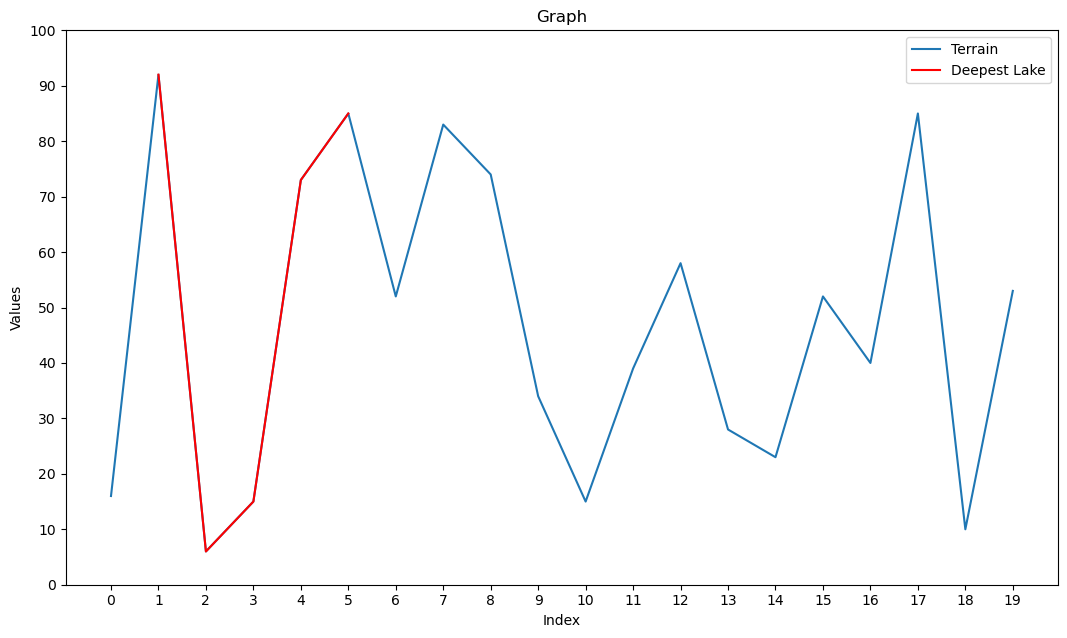

In [6]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# User inputs for range of random values
fnumber = int(input("First number: "))
snumber = int(input("Second number: "))
ranges = int(input("Ranges number: "))

# Generate a list of random integers within the given range
randomValues = np.random.randint(fnumber, snumber, ranges)
print("Generated values:", randomValues)

# Function to find the deepest lake (valley between peaks)
def find_deepest_lake(heights):
    peaks, _ = find_peaks(heights)  # Find peaks
    valleys, _ = find_peaks(-heights)  # Find valleys (negative peaks)

    if len(peaks) < 2 or len(valleys) == 0:
        return 0, [], None, None  # No valid lake found

    left_peaks = np.searchsorted(peaks, valleys) - 1
    right_peaks = left_peaks + 1

    valid_mask = (left_peaks >= 0) & (right_peaks < len(peaks))
    left_peaks, right_peaks, valleys = peaks[left_peaks[valid_mask]], peaks[right_peaks[valid_mask]], valleys[valid_mask]

    depths = np.minimum(heights[left_peaks], heights[right_peaks]) - heights[valleys]
    max_idx = np.argmax(depths) if len(depths) > 0 else None

    if max_idx is None or depths[max_idx] <= 0:
        return 0, [], None, None  # No valid lake found

    leftIdx, rightIdx = left_peaks[max_idx], right_peaks[max_idx]
    return depths[max_idx], heights[leftIdx:rightIdx + 1], leftIdx, rightIdx

# Find the deepest lake
max_depth, lake, leftIdx, rightIdx = find_deepest_lake(randomValues)
print("Deepest lake depth:", max_depth)
print("Deepest lake section:", lake)

# Visualization of the generated values and the deepest lake
plt.figure(figsize=(12.8, 7.2))
plt.plot(randomValues, linestyle='-', label="Terrain")

# Highlight the deepest lake section in red
if leftIdx is not None and rightIdx is not None:
    plt.plot(np.arange(leftIdx, rightIdx + 1), randomValues[leftIdx:rightIdx + 1], linestyle='-', color='red', label="Deepest Lake")

plt.title("Graph")
plt.yticks(np.arange(fnumber-1, snumber+10, snumber/10))
plt.xticks(np.arange(0, ranges, 1))
plt.xlabel("Index")
plt.ylabel("Values")
plt.legend()
plt.show()